## Project No1 - The Mind

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [2]:
def sample_cards(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=False)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [3]:
cards = sample_cards(100, 6, 3)
cards

array([[10, 60, 68],
       [19, 25, 88],
       [41, 61, 78],
       [ 6, 11, 57],
       [ 3, 14, 52],
       [37, 51, 79]])

and access the cards of each player with 

In [4]:
player0 = cards[0,:]
player1 = cards[1,:]
player0, player1

(array([10, 60, 68]), array([19, 25, 88]))

The lowest card in the game is

In [5]:
np.min(cards)

3

In [6]:
np.arange(1, 5)

array([1, 2, 3, 4])

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

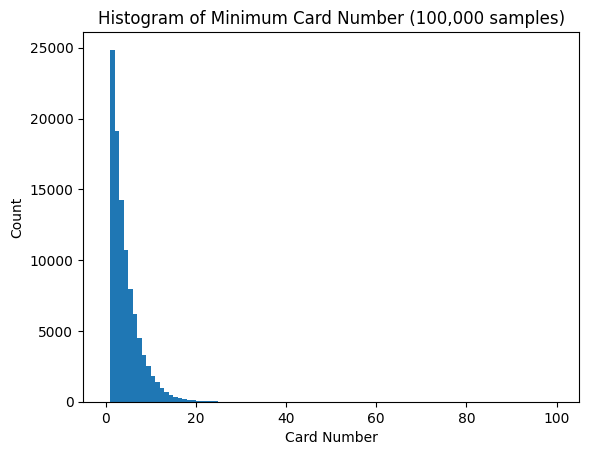

In [7]:
# To Do cell

# Set the paramters for the random draws
N = 100  # Number of cards
n = 5  # Number of players
k = 5  # Number of cards per player

n_draws = int(1e5)  # Number of times to shuffle and draw the cards

# Grab the min card during each draw for n_draws
min_card_per_draw = np.asarray(
    [sample_cards(N, n, k).min() for _ in range(n_draws)],
    dtype=int
)

# Plotting functions
plt.hist(min_card_per_draw, bins=(np.arange(N+1)))
plt.title(f"Histogram of Minimum Card Number ({n_draws:,} samples)")
plt.xlabel("Card Number")
plt.ylabel("Count")
plt.show()

# plt.hist(min_card_per_draw, bins=(np.arange(N) + 1))
# plt.title(f"Histogram of Minimum Card Number on Log Scale ({n_draws:,} samples)")
# plt.xlabel("Card Number")
# plt.ylabel("log(Count)")
# plt.yscale("log")
# plt.show()

### 2. What is the distribution of the largest gap?

For each simulation, found the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

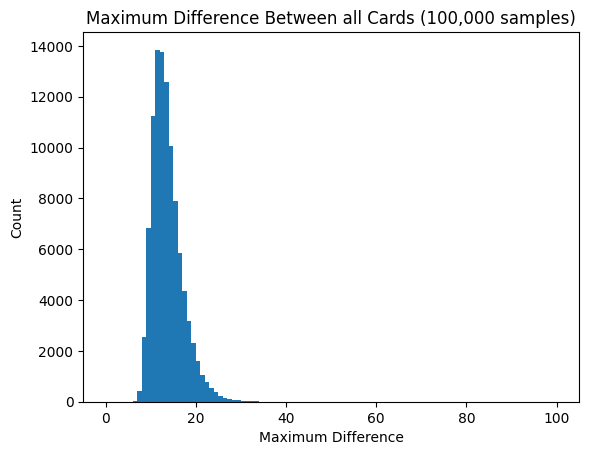

In [8]:
# To Do cell

# Set the paramters for the random draws
N = 100  # Number of cards
n = 5  # Number of players
k = 5  # Number of cards per player
n_draws = int(1e5)  # Number of times to shuffle and draw the cards


def get_maximum_difference_between_cards(N, n, k, n_draws):
    """Calculate the maximum difference between consecutive cards for some
    random draw.
    
    Arguments: TODO
    
    Returns:
        (np.array) Array of maximim difference per draw
    """

    # Create empty array for holding the maximum diff per round
    max_diffs = np.zeros(n_draws)

    # Iterate over each of the rounds
    for i in range(n_draws):
        cards = sample_cards(N, n, k)
        tmp = np.sort(cards.flat)
        tmp = np.diff(tmp)
        max_diffs[i] = tmp.max()
        
    return max_diffs

# Run the calculation and plot
max_diffs = get_maximum_difference_between_cards(N, n, k, n_draws)
    
plt.hist(max_diffs, bins=np.arange(N+1))
plt.title(f"Maximum Difference Between all Cards ({n_draws:,} samples)")
plt.xlabel("Maximum Difference")
plt.ylabel("Count")
plt.show()

Repeat the experiment but know compute the largest gap between cards of different players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

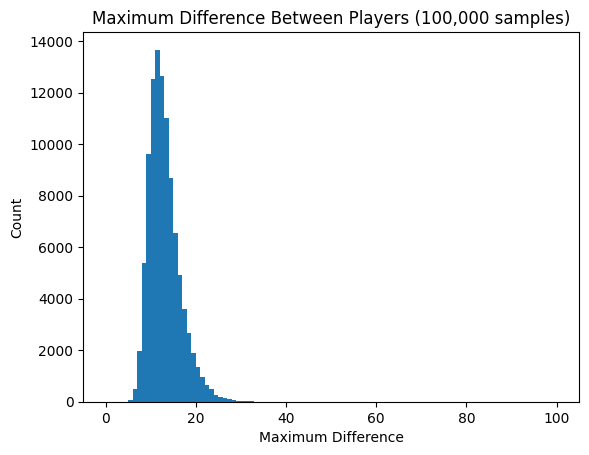

In [9]:
# To Do cell

def get_maximum_difference_between_players(N, n, k, n_draws):
    """Calculate the maximum difference between consecutive cards in different
    player's hands for some random draw
    
    Arguments: TODO
    
    Returns: TODO
    """
    # Create empty array for holding the maximum diff between players per round
    max_diffs_between_players = np.zeros(n_draws)

    # Helper player index array
    player_indexes = np.repeat(np.arange(n), k).reshape((n, k))

    for i in range(n_draws):
        cards = sample_cards(N, n, k).flatten()
        p_indexes = player_indexes.copy().flatten()

        # Find the order of the players
        sorted_idxs = np.argsort(cards)
        player_order = p_indexes[sorted_idxs]

        # Sort all the cards
        cards.sort()

        max_diff = -1  # Instantiate dummy maximum differnece variable
        for j in range((n * k) - 1):
            if player_order[j] != player_order[j+1] and cards[j+1] - cards[j] > max_diff:
                max_diff = cards[j+1] - cards[j]

        max_diffs_between_players[i] = max_diff
        
    return max_diffs_between_players


# Set the paramters for the random draws
N = 100  # Number of cards
n = 5  # Number of players
k = 5  # Number of cards per player
n_draws = int(1e5)  # Number of times to shuffle and draw the cards

# Run the calculation and plot
max_diffs_between_players = get_maximum_difference_between_players(N, n, k, n_draws)
            
plt.hist(max_diffs_between_players, bins=np.arange(N+1))
plt.title(f"Maximum Difference Between Players ({n_draws:,} samples)")
plt.xlabel("Maximum Difference")
plt.ylabel("Count")
plt.show()

How does these compare? Run simulations for different choices of the number of cards and players and see when the difference between these two is larger. 

Compute the mean of the two distributions. When this difference is larger? How does this depends of the total number of players `n`?

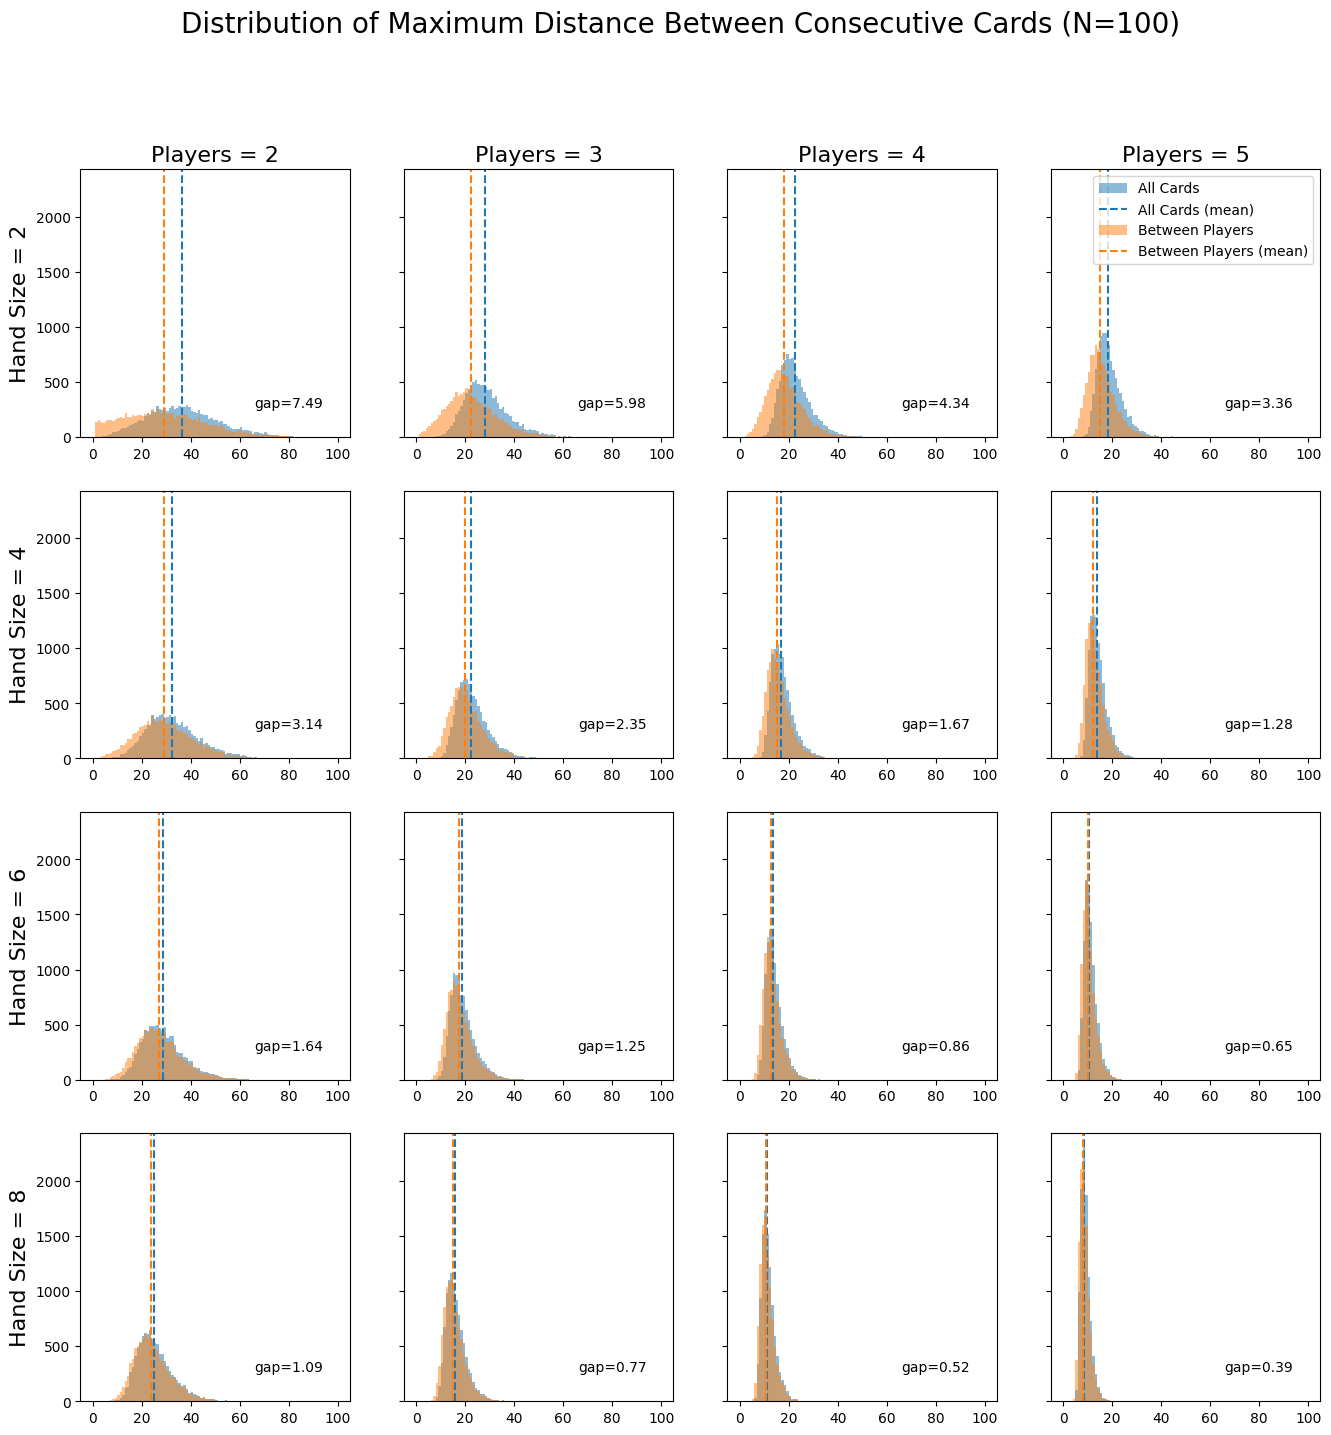

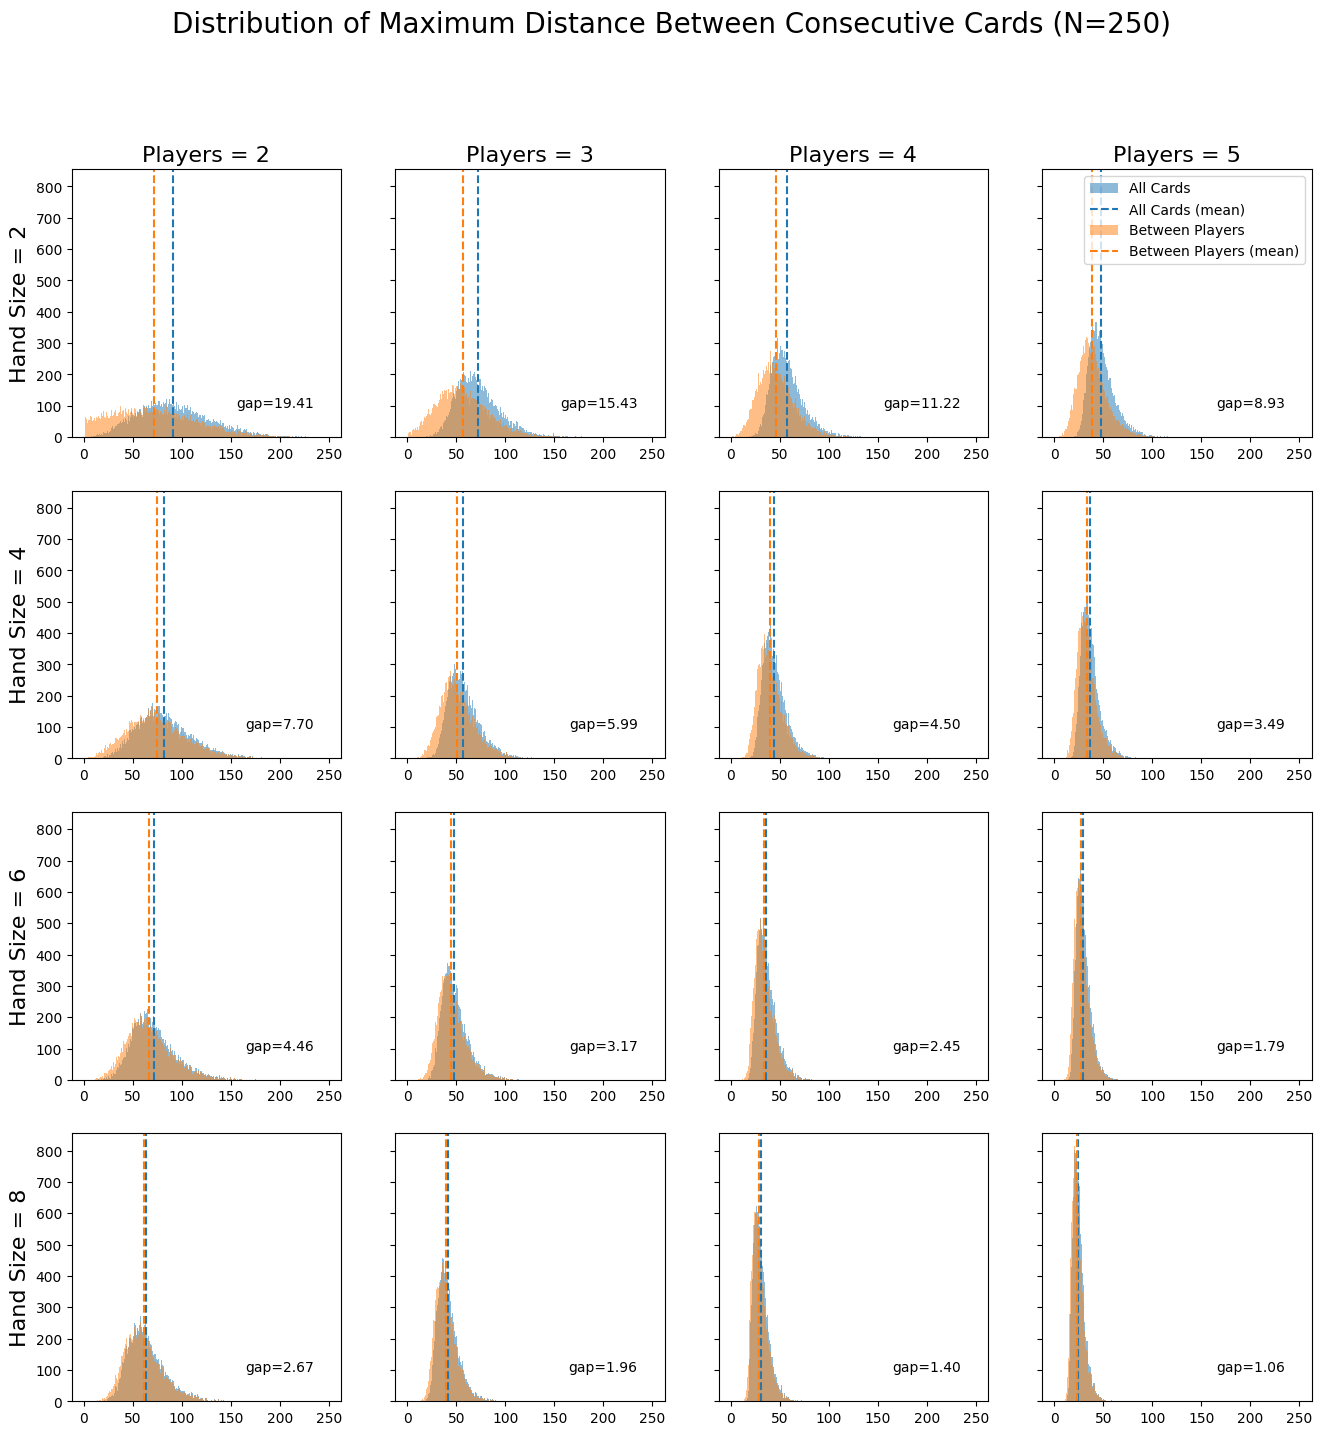

In [11]:
# To Do cell


# Helper plotting functions
def plot_hist_helper(ax, data, bins, color, mean=True, label="", **kwargs):
    """Plots a single histogram on an axes along with a line for the mean of the
    density. Additional keyword arguments are passed to the plt.hist function

    Arguments: TODO

    Returns: TODO

    """
    ax.hist(data, bins=bins, label=label, color=color, **kwargs)
    if mean:
        ax.axvline(np.mean(data), label=f"{label} (mean)", linestyle="--", color=color)


def plot_gap_stats_over_n_and_p(
    ns, ks, N, n_draws, colors=["C0", "C1"], figsize=(16, 16)
):
    """Full plotting function to generate a grid of histogram plots over a set of
    number of players and hand sizes.

    Arguments: TODO

    Returns: TODO
    """
    # Create a grid of histograms with different player and hand counts
    fig, ax = plt.subplots(
        nrows=len(ns), ncols=len(ks), figsize=(16, 16), sharex=False, sharey=True
    )
    for i, _n in enumerate(ns):
        for j, _k in enumerate(ks):
            # Calculate gap statistics for draws
            # Use seed so both statistics are calculated from the same hand draws
            np.random.seed()  # Reset seed
            seed = np.random.randint(0, 1000000)  # draw new constant seed
            np.random.seed(seed)  # seed the randomizer

            max_diffs_all = get_maximum_difference_between_cards(N, _n, _k, n_draws)

            np.random.seed(seed)  # seed the randomizer again

            max_diffs_players = get_maximum_difference_between_players(
                N, _n, _k, n_draws
            )

            # Call the plotting functions
            plot_hist_helper(
                ax[i, j],
                max_diffs_all,
                bins=np.arange(N + 1),
                label="All Cards",
                color=colors[0],
                alpha=0.5,
            )
            plot_hist_helper(
                ax[i, j],
                max_diffs_players,
                bins=np.arange(N + 1),
                label="Between Players",
                color=colors[1],
                alpha=0.5,
            )

            # Calculate and plot the gap betwen the means
            gap = np.mean(max_diffs_all) - np.mean(max_diffs_players)
            ax[i, j].text(
                0.9,
                0.1,
                f"gap={gap:.2f}",
                ha="right",
                va="bottom",
                transform=ax[i, j].transAxes,
            )

    # Setting titles for the different columns and rows
    _ = [ax[0, i].set_title(f"Players = {ns[i]}", fontsize=16) for i in range(len(ns))]
    _ = [
        ax[i, 0].set_ylabel(f"Hand Size = {ks[i]}", fontsize=16) for i in range(len(ks))
    ]

    ax[0, -1].legend()
    fig.suptitle(
        f"Distribution of Maximum Distance Between Consecutive Cards (N={N})",
        fontsize=20,
    )


# Paramerers to simulate draws over (to adjust)
ns = [2, 3, 4, 5]
ks = [2, 4, 6, 8]
# Set the paramters for the random draws
N = 100  # Number of cards
n_draws = int(1e4)  # Number of times to shuffle and draw the cards


plot_gap_stats_over_n_and_p(ns, ks, N, n_draws)
plt.show()


# Change the total number of cards in the game
N = 250
plot_gap_stats_over_n_and_p(ns, ks, N, n_draws)
plt.show()


## Interpretation of Figures

*TODO: Expand on explinations*

 - In all cases, the average largest gap between consecuative cards is larger when looking at all cards as compared to the maximum gap between players; this makes sense since there are less chances within players hands (clean this sentence up)
 - As the number of players increases, the distributions of largest consecuitive gaps between all cards and largest gap between cards in different players' hands approach eachother.
 - Simmilarly, as the hand size increases, the gap between the means decreases and the distributions approach eachother.
 - The gap between cards also increases as the total number of cards to draw from increases; however, this behavior does not indicate that the distributions are more divergent because the sample space has increased.
 - The relative gap size -- relative to the sample space -- remains roughly constant.
    - $\frac{7.49}{100} = 0.0749 \approx 0.07764 = \frac{19.71}{250}$
    - $\frac{7.49}{100} = 0.0749 \approx 0.07764 = \frac{19.71}{250}$
 - (Further explination

### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_game()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`).

### Approach

The code below approximates a binomial distribution from a random card draw by choosing a threshold value $0\leq t \leq N$ where $t = N \cdot p$ where $p$ is the desired probability for the binomial distribution.
The number of cards in the random draw below this threshold value are counted which approximates the number of successful trials in the binomial distribution.

It is important to note that the each of the Bernoulli trials for a card to be below the threshold value are not wholely independent since cards are not drawn with replacement meaning drawing a card below the threshold value decreases the probability that the next card will also be below the threshold.
However, choosing an $N \gg n\cdot k$ mitigates this problem because the change in probability is small.

30


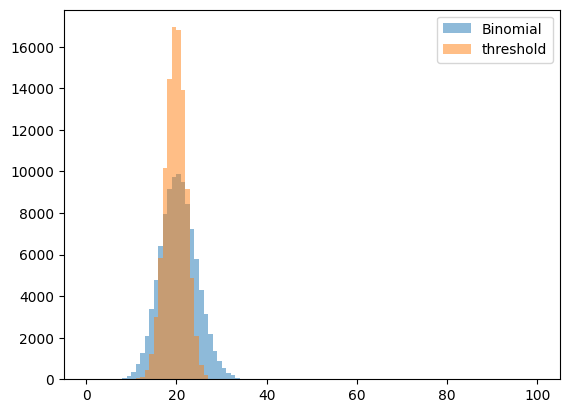

In [20]:
# To Do cell

# Set the paramters for the random draws
N = 2000  # Number of cards
n = 10  # Number of players
k = 10  # Number of cards per player
n_draws = int(1e5)

p = 0.2  # Desired probability value
th = int(N * p)

print(th)

# np.random.seed(1)
below_th_per_draw = np.asarray(
    [np.sum(sample_cards(N, n, k) < th) for _ in range(n_draws)],
    dtype=int
)

foo = np.random.binomial(n*k, p, int(n_draws))

# Individual histograms overlapping
plt.hist(foo, bins=np.arange(n*k+1), label="Binomial", alpha=0.5)
plt.hist(below_th_per_draw, bins=np.arange(n*k+1), label="threshold", alpha=0.5)

# # Histograms aligned to eachother
# plt.hist(
#     [below_th_per_draw, foo],
#     bins=np.arange(n*k+1),
#     label=["threshold", "Binomial"],
#     alpha=0.5
# )

plt.legend()
plt.show()

### 3.2. Beta Distribution

The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution are such that follow a Beta distribution. If well here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$th order statistics of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

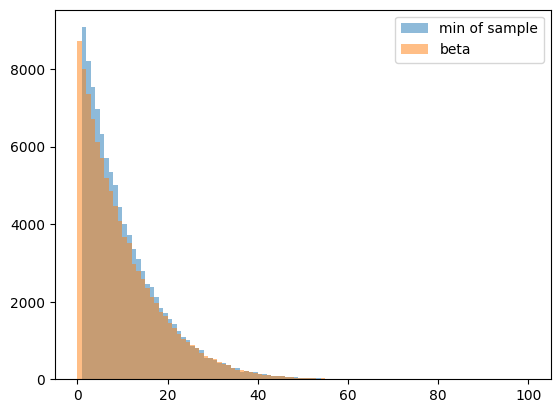

In [13]:
# To Do cell

# Set the paramters for the random draws
N = 100  # Number of cards
n = 3  # Number of players
k = 3  # Number of cards per player

n_draws = int(1e5)  # Number of times to shuffle and draw the cards

# Grab the min card during each draw for n_draws
min_card_per_draw = np.asarray(
    [sample_cards(N, n, k).min() for _ in range(n_draws)],
    dtype=int
)

# Looking at the 0th order statistic, so k = 1
# Have n * k total points so n = n * k
k_beta = 1
n_beta = n * k
beta_dist = np.random.beta(a=k_beta, b=n_beta - k_beta + 1, size=n_draws) * N

plt.hist(min_card_per_draw, bins=np.arange(N+1), label="min of sample", alpha=0.5)
plt.hist(beta_dist, bins=np.arange(N+1), label="beta", alpha=0.5)

plt.legend()
plt.show()

### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

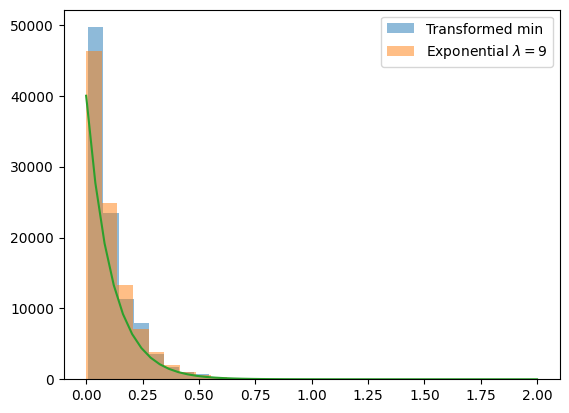

In [25]:
# To Do cell

# Set the paramters for the random draws
N = 100  # Number of cards
n = 3  # Number of players
k = 3  # Number of cards per player

n_draws = int(1e5)  # Number of times to shuffle and draw the cards

# Grab the min card during each draw for n_draws
min_card_per_draw = np.asarray(
    [sample_cards(N, n, k).min() for _ in range(n_draws)],
    dtype=int
)

# Transform the minimum values
transformed_min = -np.log(1 - (min_card_per_draw / N))
# bins = -np.log(1 - (np.arange(N+1) / N))

# plt.plot(np.arange(N+1), bins)

foo = np.random.exponential(1/(n*k), size=n_draws)

# plt.hist(transformed_min, bins=bins)
# plt.hist(transformed_min, bins=np.linspace(0, 1, N//2))
plt.hist(transformed_min, bins=20, alpha=0.5, label="Transformed min")
plt.hist(foo, bins=20, alpha=0.5, label=f"Exponential $\lambda={n*k}$")

plt.legend()
plt.show()

### 4. What happens when $n * k << N$?

Some of the distribution we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without reposition compare as $n * k << N$. What do you expect to see in these cases? When the difference between the two sampling strategies will lead to similar or different results. 

### Explanation

Given that we sample cards without replacement, each time a card is draw below some value the probability that the next card is drawn below that value again is decreased.
When $n\cdot k$ is roughly the same magnitude as $N$, then this decrease in probability is large.
When $n\cdot k$ is smaller than $N$, then this decrease in probability is somewhat diminished.
When $n\cdot k$ is much smaller than $N$, then this decrease in probability becomes negligible.

The plots below display this behavior.

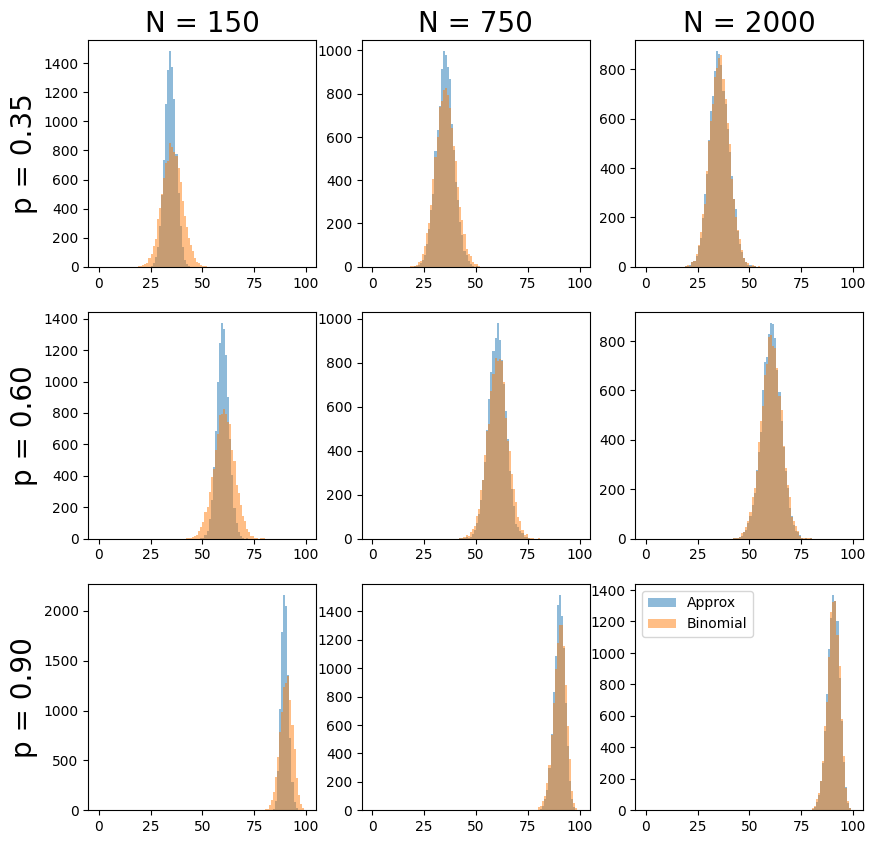

In [34]:
# To Do cell

# Using binomial approximation as an example

fig, ax = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(10, 10))

# These parameters are 
n = 10  # Number of players
k = 10  # Number of cards per player
n_draws = int(1e4)
for i, _p in enumerate([0.35, 0.6, 0.9]):
    for j, _N in enumerate([150, 400, 2000]):
        th = int(_N * _p)

        below_th_per_draw = np.asarray(
            [np.sum(sample_cards(_N, n, k) < th) for _ in range(n_draws)],
            dtype=int
        )
        
        foo = np.random.binomial(n*k, _p, int(n_draws)) 

        b = np.arange(n*k+1)
        ax[i, j].hist(below_th_per_draw, bins=b, label="Approx", alpha=0.5)
        ax[i, j].hist(foo, bins=b, label="Binomial", alpha=0.5)

ax[0, 0].set_title("N = 150", fontsize=20)
ax[0, 1].set_title("N = 750", fontsize=20)
ax[0, 2].set_title("N = 2000", fontsize=20)

ax[0, 0].set_ylabel("p = 0.35", fontsize=20)
ax[1, 0].set_ylabel("p = 0.60", fontsize=20)
ax[2, 0].set_ylabel("p = 0.90", fontsize=20)

plt.legend()
plt.show()

### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: Matthew Giammar
- Member No2: Mara Baylis
- Member No3: Claire LeBlanc